# Método Theta Otimizado em R

por **Cibele Russo**

In [ ]:
# Instale o pacote se necessário
# install.packages('forecTheta')
# Documentação sobre forecTheta: https://cran.r-project.org/web/packages/forecTheta/forecTheta.pdf

##############################################################	


Loading required package: parallel

Loading required package: forecast

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Loading required package: tseries



A Time Series:
 [1]  2.192546  2.240373  3.132946  2.148672  2.125902  2.132943  3.756085
 [8]  3.567516  4.347541  5.525859  5.737408  3.928577  3.474090  1.911353
[15]  3.823443  5.171620  4.537597  3.067044  4.289098  5.331006  6.214719
[22]  4.639291  6.747556  6.025736  6.182361  6.460303  7.757305  7.919732
[29]  9.552242  5.060901  8.433847 10.123662  9.080683  9.949407  9.446830
[36]  8.543112  8.954365 10.625323 11.808937  9.664975 12.112144 11.881506
[43] 12.185136 12.126206 10.767259 13.812977 12.618907 13.348175 13.240933
[50] 14.643336

Forecast method: Dynamic Optimised Theta Model 

Seasonal decomposition: none 

Optimisation method: Nelder-Mead 

Estimative of parameters:
            MLE
ell0       0.17
alpha      0.24
theta 110316.61

Forecasting points and prediction intervals
Time Series:
Start = 51 
End = 60 
Frequency = 1 
       Mean    Lo 80    Hi 80    Lo 90    Hi 90    Lo 95    Hi 95
51 14.06643 12.35617 15.41245 11.74572 15.74843 11.42562 16.21823
52 14.31655 12.51134 16.00034 12.11546 16.25170 11.94702 16.76355
53 14.56741 13.06137 16.14541 12.40562 16.64547 12.16802 16.78992
54 14.81894 13.02847 16.50388 12.50498 16.95307 12.01722 17.39297
55 15.07109 13.44274 16.82243 12.67314 17.34651 12.18506 17.91512
56 15.32378 13.64155 16.93891 13.07963 17.41700 12.69981 17.76817
57 15.57699 13.93116 17.24533 13.63664 17.59792 13.16302 17.88392
58 15.83065 14.10912 17.94543 13.33760 18.45114 13.15164 18.78080
59 16.08474 14.33103 17.76950 13.66851 18.47181 13.13999 19.02381
60 16.33921 14.04086 18.20061 13.68516 1

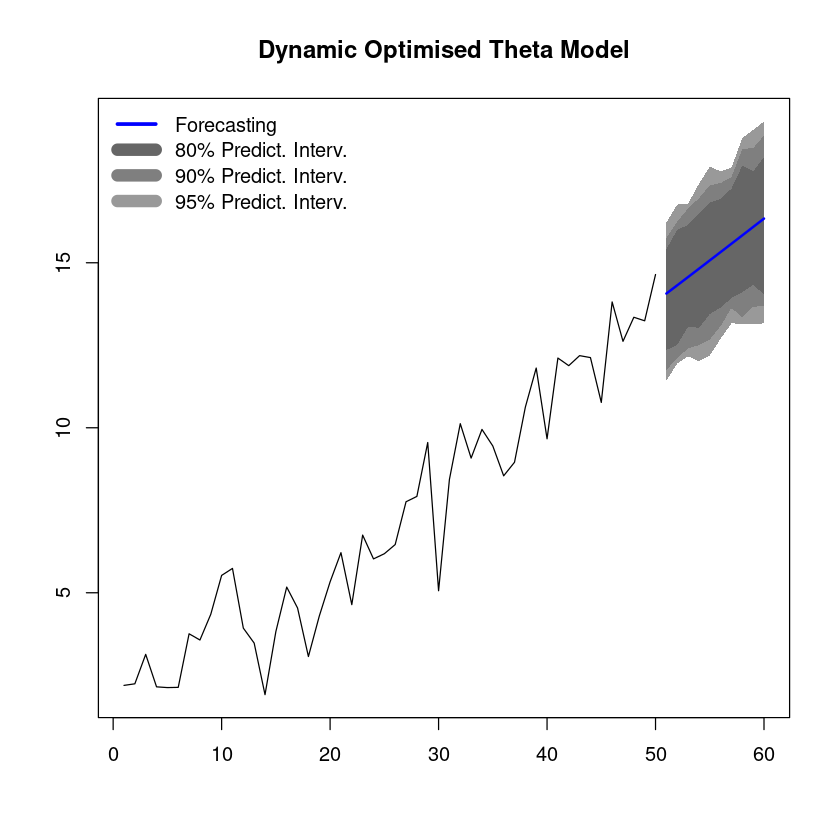

In [1]:
library(forecTheta)
y1 = 2+ 0.15*(1:20) + rnorm(20)
y2 = y1[20]+ 0.3*(1:30) + rnorm(30)
y =  as.ts(c(y1,y2))

y

out <- dotm(y, h=10)
summary(out)
plot(out)



Forecast method: Dynamic Optimised Theta Model 

Seasonal decomposition: none 

Optimisation method: Nelder-Mead 

Estimative of parameters:
        MLE
ell0   0.44
alpha  0.25
theta 13.27

Forecasting points and prediction intervals
Time Series:
Start = 41 
End = 50 
Frequency = 1 
       Mean     Lo 80    Hi 80    Lo 90    Hi 90    Lo 95    Hi 95
41 10.65918  8.757126 12.23048 8.303427 12.59018 7.983666 12.80294
42 10.86537  9.311339 12.63080 8.794006 13.27398 8.249145 13.65026
43 11.07179  9.379414 12.90583 9.006603 13.46071 8.424764 13.82480
44 11.27838  9.546957 12.91290 9.024927 13.80730 8.829968 14.15865
45 11.48509  9.307918 13.64572 8.891150 14.28752 8.215876 14.94687
46 11.69186  9.391320 13.72511 8.771892 14.12688 8.647202 14.55861
47 11.89866  9.756046 13.89462 9.093988 14.57114 8.445263 14.89014
48 12.10545  9.701846 14.36484 9.146432 14.96141 8.861674 15.69368
49 12.31219 10.048745 14.24255 8.787568 14.95109 8.452578 15.54803
50 12.51886 10.202892 14.88538 9.810667 15.361

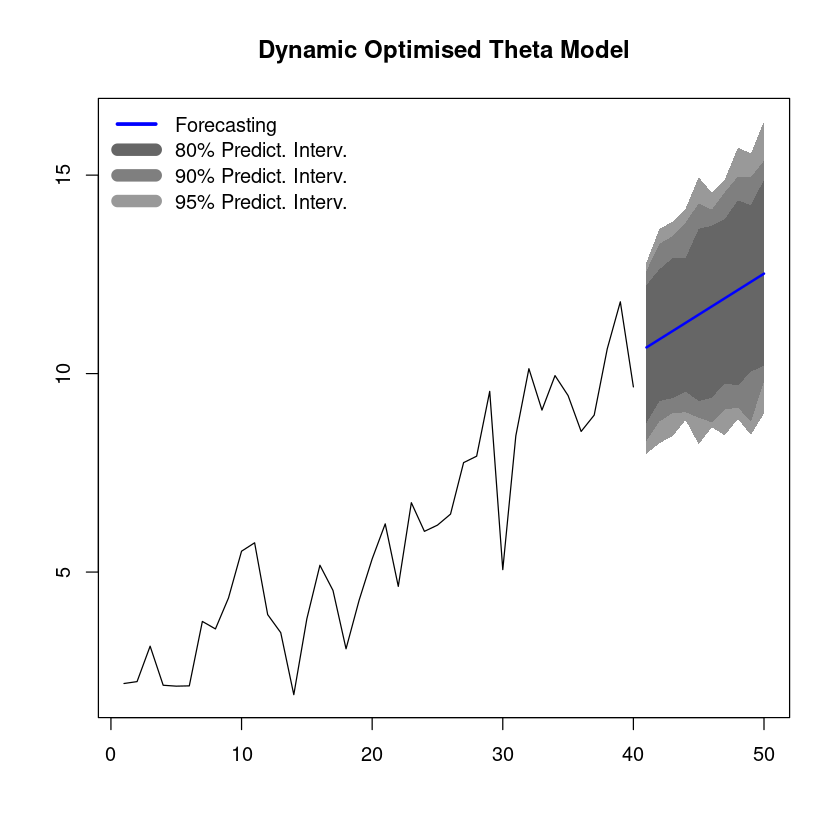

In [2]:
out <- dotm(y=as.ts(y[1:40]), h=10)
summary(out)
plot(out)

Forecast method: Standard Theta Method (STheta) 

Seasonal decomposition: none 

Optimisation method: Nelder-Mead 

Estimative of parameters:
        MLE
ell0^* 2.95
alpha  0.33

Forecasting points and prediction intervals
Time Series:
Start = 41 
End = 50 
Frequency = 1 
 [1] 10.39814 10.50773 10.61733 10.72692 10.83652 10.94612 11.05571 11.16531
 [9] 11.27490 11.38450

Information Criterions
     Estimative
AIC    135.2523
AICc   135.5767
BIC    138.6301

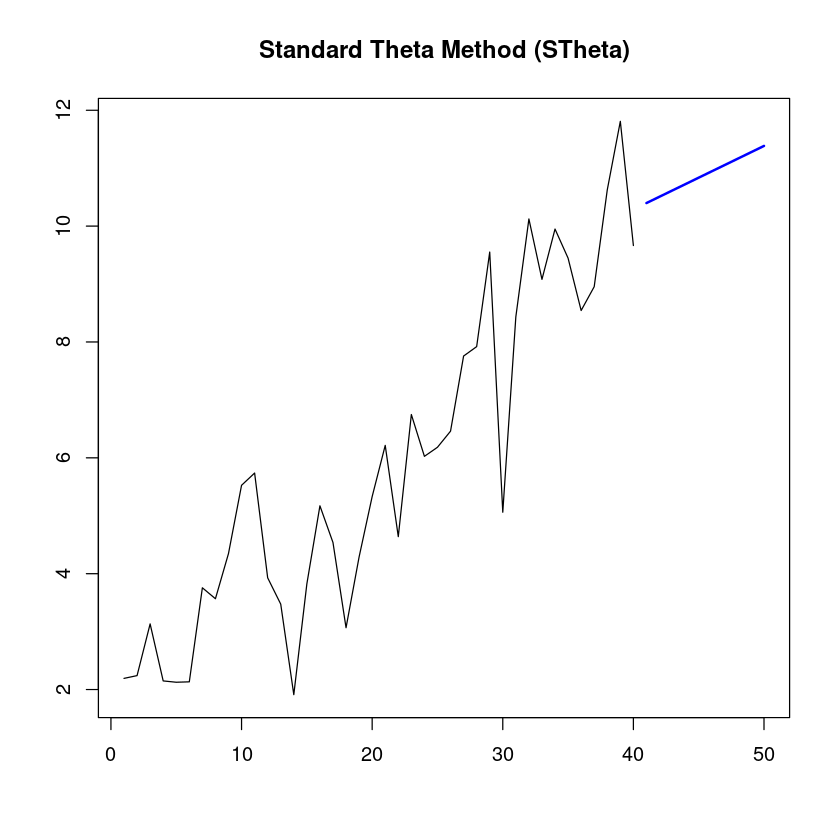

In [3]:
out2 <- stheta(y=as.ts(y[1:40]), h=10)
summary(out2)
plot(out2)


In [4]:
# Métricas para comparar as duas previsões
# Referências

# https://en.wikipedia.org/wiki/Mean_absolute_percentage_error
# https://en.wikipedia.org/wiki/Mean_absolute_scaled_error


### sMAPE metric
errorMetric(obs=as.ts(y[41:50]), forec=out$mean, type = "sAPE", statistic = "M")
errorMetric(obs=as.ts(y[41:50]), forec=out2$mean, type = "sAPE", statistic = "M")

### sMdAPE metric
errorMetric(obs=as.ts(y[41:50]), forec=out$mean, type = "sAPE", statistic = "Md")
errorMetric(obs=as.ts(y[41:50]), forec=out2$mean, type = "sAPE", statistic = "Md")

### MASE metric
meanDiff1 = mean(abs(diff(as.ts(y[1:40]), lag = 1)))
errorMetric(obs=as.ts(y[41:50]), forec=out$mean, type = "AE", statistic = "M") / meanDiff1
errorMetric(obs=as.ts(y[41:50]), forec=out2$mean, type = "AE", statistic = "M") / meanDiff1


[1] 10.01516

[1] 14.93919

[1] 9.254307

[1] 14.48993

[1] 1.076975

[1] 1.574596